In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

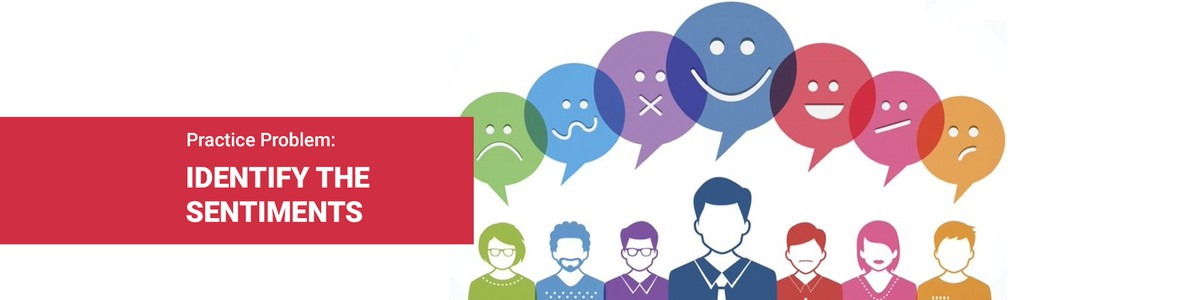


# -Analytics Vidhya Hackathon

https://datahack.analyticsvidhya.com/contest/linguipedia-codefest-natural-language-processing-1/#About

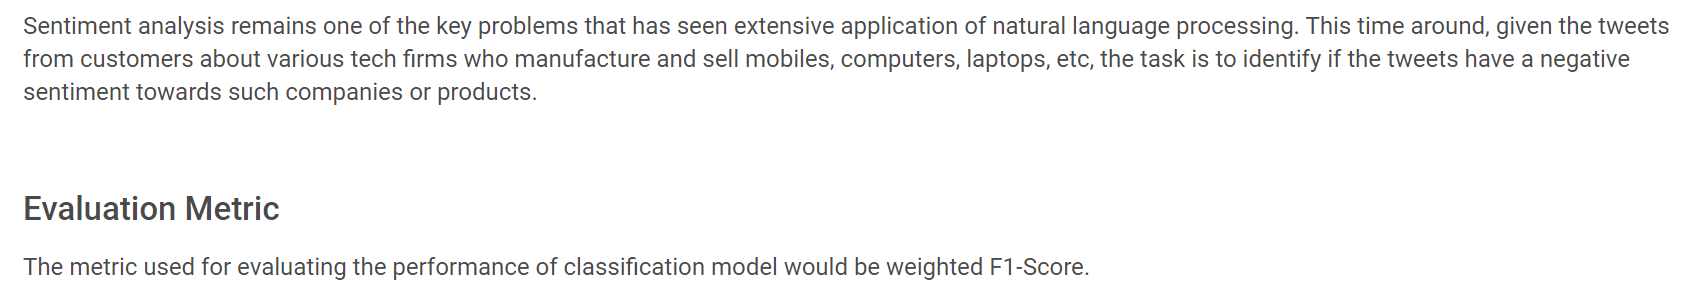

In [129]:
import pandas as pd
import seaborn as sns

In [130]:
train_df = pd.read_csv('../input/detect-the-sentiments/train_2kmZucJ.csv')
test_df = pd.read_csv('../input/detect-the-sentiments/test_oJQbWVk.csv')

In [131]:
train_df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [132]:
test_df.head()

,id,tweet
0,7921,I hate the new #iphone upgrade. Won't let me d...
1,7922,currently shitting my fucking pants. #apple #i...
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t..."
3,7924,My ipod is officially dead. I lost all my pict...
4,7925,Been fighting iTunes all night! I only want th...


Given the problem statement the 0 label represent that the tweet doesn't have a negative sentiment towards the product or comapany and Label 1 represents that the tweet has a negative sentiment.

Lets look at some random tweets.

In [133]:
train_df['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [134]:
train_df['tweet'][7919]

'Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/'

Lets do the text preprocessing.

In [135]:
text = train_df['tweet']
text

0       #fingerprint #Pregnancy Test https://goo.gl/h1...
1       Finally a transparant silicon case ^^ Thanks t...
2       We love this! Would you go? #talk #makememorie...
3       I'm wired I know I'm George I was made that wa...
4       What amazing service! Apple won't even talk to...
                              ...                        
7915    Live out loud #lol #liveoutloud #selfie #smile...
7916    We would like to wish you an amazing day! Make...
7917    Helping my lovely 90 year old neighbor with he...
7918    Finally got my #smart #pocket #wifi stay conne...
7919    Apple Barcelona!!! #Apple #Store #BCN #Barcelo...
Name: tweet, Length: 7920, dtype: object

In [136]:
test_text = test_df['tweet']
test_text

0       I hate the new #iphone upgrade. Won't let me d...
1       currently shitting my fucking pants. #apple #i...
2       I'd like to puts some CD-ROMS on my iPad, is t...
3       My ipod is officially dead. I lost all my pict...
4       Been fighting iTunes all night! I only want th...
                              ...                        
1948    #SamsungGalaxyNote7 Explodes, Burns 6-Year-Old...
1949    Now Available - Hoodie. Check it out here - ht...
1950    There goes a crack right across the screen. If...
1951    @codeofinterest as i said #Adobe big time we m...
1952    Finally I got it .. thanx my father .. #Samsun...
Name: tweet, Length: 1953, dtype: object

In [137]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 


Lemmatization is more preferrable than stemming since it preserves the semantic part of the word.

In [138]:
wordnet = WordNetLemmatizer ()
corpus = []

In [139]:
for i in range(0,len(text)):
    review = re.sub('[^a-zA-Z]',' ',text[i])  #re.sub(pattern, repl, string) - substituting characters apart from a-z,A-Z with blank space
    review = review.lower()
    review = review.split()#splitting the words
    
    review = [wordnet.lemmatize(word)  for word in review if not word in stopwords.words('english')] #for words not in stopwrods we are obtaining the root word of the words throguh stemmer(eg. preference - prefer)
    review = ' '.join(review)
    corpus.append(review)
    
    

In [140]:
test_corpus = []
for i in range(0,len(test_text)):
    review = re.sub('[^a-zA-Z]',' ',text[i])  #re.sub(pattern, repl, string) - substituting characters apart from a-z,A-Z with blank space
    review = review.lower()
    review = review.split()#splitting the words
    
    review = [wordnet.lemmatize(word)  for word in review if not word in stopwords.words('english')] #for words not in stopwrods we are obtaining the root word of the words throguh stemmer(eg. preference - prefer)
    review = ' '.join(review)
    test_corpus.append(review)


In [141]:
corpus[2]

'love would go talk makememories unplug relax iphone smartphone wifi connect http fb n lsupcu'

In [142]:
test_corpus[10]

'hey apple make new ipod dont make new color inch thinner make crash every five fuckin minite'

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [144]:
tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [145]:
y = train_df['label']

In [146]:
test = tfidf_v.fit_transform(test_corpus).toarray()

In [147]:
X.shape

(7920, 5000)

Since we had 7920 tweets in total and 5000 max features,  hence forms an array of shape - (7920,5000).

**Lets split the data into training and testing.**

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [150]:
tfidf_v.get_feature_names()[:20] #this is for the training text #the top 20 words

['aa',
 'ab',
 'able',
 'able get',
 'absolutely',
 'abujacity',
 'abujacity capitalhub',
 'abujacity capitalhub buy',
 'abujafct',
 'abujafct abujapeople',
 'abujafct abujapeople wuse',
 'abujapeople',
 'abujapeople wuse',
 'abujapeople wuse abujaphones',
 'abujaphones',
 'abujaphones gadget',
 'abujaphones gadget abujacity',
 'accept',
 'acceptable',
 'accessory']

In [151]:
tfidf_v.get_params() #for the training text

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [152]:
count_df = pd.DataFrame(X_train,columns=tfidf_v.get_feature_names())

In [153]:
count_df

,aa,ab,able,able get,absolutely,abujacity,abujacity capitalhub,abujacity capitalhub buy,abujafct,abujafct abujapeople,...,zg,zip,zip hoodie,zoom,zpr,zpr io,zpr io nv,zq,zsf,zv
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Looks great! This dataframe represents how the tf-idf vectors are formed.

# MultiNomial NB

In [154]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,f1_score

In [155]:
classifier = MultinomialNB()
classifier.fit(X_train,y_train)


MultinomialNB()

In [156]:
pred = classifier.predict(X_test)

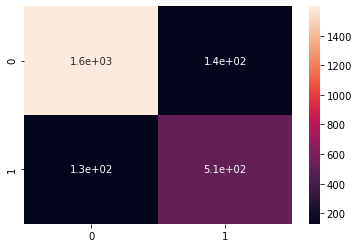

In [157]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [158]:
f1_score(y_test,pred)

0.7937984496124031

# Passive Agressive Classifier

In [159]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [160]:
lnr_classifier = PassiveAggressiveClassifier(n_iter_no_change=50)
lnr_classifier.fit(X_train,y_train)
pred2 = lnr_classifier.predict(X_test)

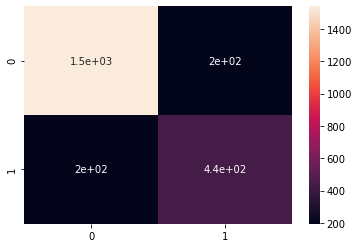

In [161]:
sns.heatmap(confusion_matrix(y_test,pred2),annot=True)

In [162]:
f1_score(y_test,pred2)

0.6875981161695447

MultinomialNB is giving a better performance . Lets predict for the testing data using MultiNomialNb.

Now lets predict for the test data.

In [163]:
pred_final = classifier.predict(test)

In [164]:
submission = pd.DataFrame()
submission['id'] = test_df['id']
submission['label'] = pred_final

In [165]:
submission

,id,label
0,7921,0
1,7922,0
2,7923,0
3,7924,0
4,7925,1
...,...,...
1948,9869,0
1949,9870,0
1950,9871,0
1951,9872,0


In [166]:
submission['label'].value_counts()

0    1663
1     290
Name: label, dtype: int64